### Clipping The netcdf files by shapefiles

In [1]:
import xarray as xr
import numpy as np
import regionmask 
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os, sys
import warnings; warnings.filterwarnings(action='ignore')
%matplotlib inline

#Getting the currecnt working directory
pwd = os.getcwd()
os.chdir(pwd)
print(pwd)

/media/sf_sharedfolder/climate_data


In [2]:
shapefile = os.path.join(pwd +"/NUTS_RG_20M_2021_4326/")
shapefile = shapefile + "NUTS_RG_20M_2021_4326.shp"
countries = gpd.read_file(shapefile, header='None')
querry = 3
countries = countries[countries['LEVL_CODE'] == querry]
"""
#countries['geometry']
#for i in range(0, countries.shape[0]):
#    print(i)
#----------------------------------------------
#Excel
#----------------------------------------------
countries['NUTS_ID'].to_excel("codes.xlsx")
df = pd.read_excel("codes.xlsx")
correct_df = df.copy()
correct_df.rename(columns={' Unnamed: 0': 'NUTS_ID'})
print(correct_df)
"""
#----------------------------------------------
#csv
#----------------------------------------------
#countries['NUTS_ID'].to_csv("codes.csv")
#df = pd.read_csv("codes.csv")
#print(df)
#my_dict = dict(zip(df['ID_NO'], df['NUTS_ID']))
"""
for k,v in my_dict.items():
    print(k,v)
"""
#my_dict
#for i in my_dict:
#    print(i)
#countries.to_excel("countries.xlsx")
len(countries)

1514

322    DE254
323    DE255
324    DE256
325    DE257
402    DE258
Name: NUTS_ID, dtype: object

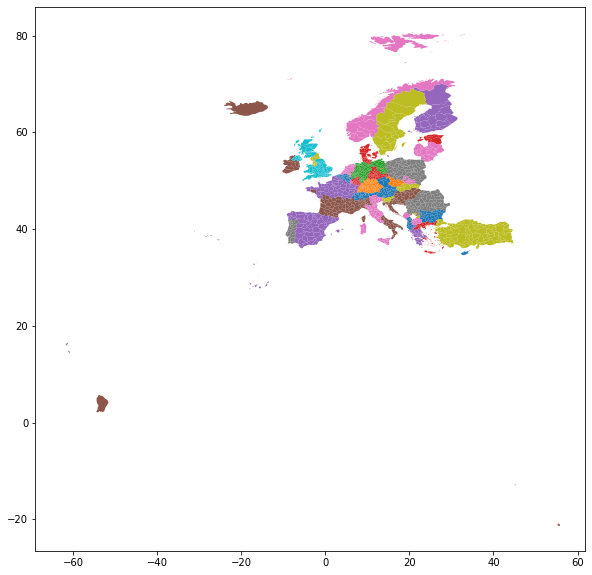

In [3]:
fig, ax = plt.subplots(figsize=(16, 10))
countries.plot(ax=ax, column='NUTS_ID')
countries.head()['NUTS_ID']
#.to_pandas().to_csv("nuts_id.csv")

## Comes the .nc file

In [5]:
#The following command is for data with single variables
print(pwd)
d = xr.open_mfdataset('year2021.nc', chunks = {'time': 10})
d = d.assign_coords(longitude=(((d.longitude + 180) % 360) - 180)).sortby('longitude')
d

/media/sf_sharedfolder/climate_data


<xarray.Dataset>
Dimensions:    (time: 365, longitude: 464, latitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
Data variables:
    tg         (time, latitude, longitude) float32 dask.array<chunksize=(10, 201, 464), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 1.9.9rc1 (https://mpimet.m...
    Conventions:    CF-1.4
    history:        Fri Jul 08 11:13:07 2022: cdo splityear tg_ens_mean_0.25d...
    E-OBS_version:  25.0e
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....
    CDO:            Climate Data Operators version 1.9.9rc1 (https://mpimet.m...

In [6]:
#CALCULATE MASK
nuts = countries
#names = list(nuts.NUTS_ID)
#len(names)
nuts_mask_poly = regionmask.Regions(name = 'nuts_mask', numbers = list(range(0,1514)), names = list(nuts.NUTS_ID), abbrevs = list(nuts.NUTS_ID), outlines = list(nuts.geometry.values[i] for i in range(0,1514)))

nuts_mask_poly

<regionmask.Regions>
Name:     nuts_mask
overlap:  False

Regions:
   0 DE254 DE254
   1 DE255 DE255
   2 DE256 DE256
   3 DE257 DE257
   4 DE258 DE258
 ...   ...   ...
1509 TRC13 TRC13
1510 TRC21 TRC21
1511 TRC22 TRC22
1512 NO0B2 NO0B2
1513 NO0B1 NO0B1

[1514 regions]

In [7]:
#Now apply the mask on the gridded dataset d.
#Select only first timestep to speed up the process
#Zoom only on the European continent
print("Masking takes a while, please wait........")
mask = nuts_mask_poly.mask(d.isel(time=0), lat_name='latitude', lon_name='longitude')
#mask
print("Mask done")

Masking takes a while, please wait........
Mask done


In [9]:
#Plot the figure 
#plt.figure(figsize=(12,8))
#ax = plt.axes()
#mask.plot(ax = ax)
#nuts.plot(ax = ax, alpha = 0.8, facecolor = 'none', lw = 1)

### Extract time-series


In [10]:
#my_dict


In [12]:
#countries = countries[countries['LEVL_CODE'] == querry]
#nuts.NUTS_ID
#print(nuts[nuts['NUTS_ID'] == ID_REGION])

#nuts_ids = []
#for i in my_dict:
#    ID_REGION = i
    #print(ID_REGION)
#    nuts_ids.append(ID_REGION)
    #print(nuts_ids)
    #print(nuts.NUTS_ID[ID_REGION])
#print(type(my_dict))
"""
for k, v in my_dict.items():
    #print(v)
    print("{}.csv".format(v))
"""

'\nfor k, v in my_dict.items():\n    #print(v)\n    print("{}.csv".format(v))\n'

In [13]:
nuts_ids = []
for i in my_dict:
    ID_REGION = i
    nuts_ids.append(ID_REGION)
    lat = mask.latitude.values
    lon = mask.longitude.values
    sel_mask = mask.where(mask == ID_REGION).values
    #print(sel_mask)
    a = []
    id_lon = lon[np.where(~np.all(np.isnan(sel_mask), axis=0))]
    id_lat = lat[np.where(~np.all(np.isnan(sel_mask), axis=1))]
    if len(id_lon) | len(id_lat) :
        #print(ID_REGION, "\t lon-->", id_lon)
        #print(ID_REGION, "\t lat-->", id_lat)
        print("\n")
        out_sel = d.sel(latitude = slice(id_lat[0], id_lat[-1]), longitude = slice(id_lon[0], id_lon[-1])).compute().where(mask == ID_REGION)
        #print(out_sel) 
        #print("\n------PLOTTING THE GRAPH OF ------",ID_REGION)
        #plt.figure(figsize=(12,8))
        #ax = plt.axes()
        #out_sel.tg.isel(time = 0).plot(ax = ax)
        #nuts.plot(ax = ax, alpha = 0.8, facecolor = 'none')
        x = out_sel.groupby('time').mean(...)
        tg_id = nuts.NUTS_ID[ID_REGION]
        x.tg.to_pandas().to_csv('{}.csv'.format(tg_id), header= ['{}'.format(tg_id)])
    else:
        pass
#print(out_sel)
print("\n------------------------------------------------------------------------------")
print("\n DONE PROCESSING..")
print("\n------------------------------------------------------------------------------")

NameError: name 'my_dict' is not defined

In [ ]:
#Plotting the masked data
#for i in out_sel:
#print(out_sel)
#plt.figure(figsize=(12,8))
#ax = plt.axes()
#out_sel.tg.isel(time = 0).plot(ax = ax)
#nuts.plot(ax = ax, alpha = 0.8, facecolor = 'none')
    

### Aggregate by the arithmetic mean using the groupby function to obtain a time-series of national average temperatures

In [ ]:
x = out_sel.groupby('time').mean(...)
#x

In [ ]:
x.tg.plot()

In [ ]:
tg_id = nuts.NUTS_ID[ID_REGION]
#x.tg.to_pandas().to_csv('average-temperature.csv', header= ['nuts.NUTS_ID[ID_REGION]'])